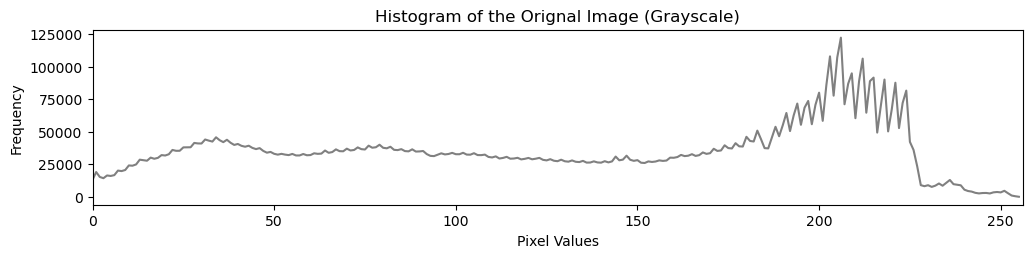

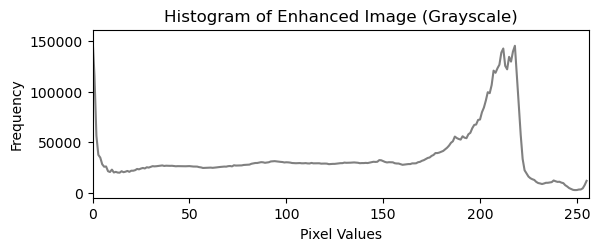

KstestResult(statistic=0.375, pvalue=2.0442774654634175e-16, statistic_location=30961.0, statistic_sign=-1)
Cross Entropy is :  [0.99]
KL_Divergence result Original vs Enhanced:  0.99
JS_Divergence result:  0.9700000286102295


In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy.stats as st

# recources used: course ppt, chatgpt-4 (not copying the code but rather as a way to 
# check my answers and see if there's better implementation)
# helper function that calculates the p value for each pixel value
def getPArray(histogramArray):
    result = histogramArray/sum(histogramArray)
    return result
# Kolmogorov - Smirnov
def ks(a,b):
    res = st.kstest(a.flatten(), b.flatten())
    print(res)
    return res

# Cross-Entropy
def crossEntropy(a,b):
    # calculate the pk and qk for a and b numpy arrays
    # need to normalize the data
    base = 256
    a = 1.0*a / np.sum(a)
    b = 1.0*b / np.sum(b)
    result = st.entropy(a, base=base) + st.entropy(a, b, base=base)
    return np.round(result,2)
# KL-divergence
def klDivergence(pk, qk):
    pk = 1.0*pk / np.sum(pk, axis=0)
    qk = 1.0*qk / np.sum(qk, axis=0)
    # check to decide if we apply single or multi entropy
    if qk is None:
        return np.sum(entropy_single(pk), axis=0)
    else:
        if len(qk) != len(pk):
            raise ValueError("qk and pk must have same length.")
        qk = 1.0*qk / np.sum(qk, axis=0)
        return np.sum(crossEntropy(pk, qk), axis=0)

# JS-divergence
def jsDivergence(p,q):
    m = (p+q)/2 # mean of them
    js = (klDivergence(p, m) + klDivergence(q, m))/2
    return js

if __name__ == "__main__":
    ## Task 1
    # Using my guinea pig (cookie)'s image and the same image with
    # "google enchanced filter"
    # recrouces used: OpenCV docs
    original = cv2.imread("./Original.jpg")
    enhanced = cv2.imread("./Enhanced.jpg")

    # I am using Greyscale of the images
    greyOriginal = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY) 
    greyEnhanced = cv2.cvtColor(enhanced, cv2.COLOR_BGR2GRAY) 
    # Using OpenCV library to calculate the histogram for the images
    # refer to https://docs.opencv.org/3.4/d8/dbc/tutorial_histogram_calculation.html 
    originalHistogram = cv2.calcHist([greyOriginal], [0], None, [256], [0, 256])
    enhancedHistogram = cv2.calcHist([greyEnhanced], [0], None, [256], [0, 256])

    plt.figure(figsize=(12, 5))
    plt.subplot(2,1,1)
    plt.plot(originalHistogram, color='gray')
    plt.title('Histogram of the Orignal Image (Grayscale)')
    plt.xlabel('Pixel Values')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.show()

    plt.subplot(2, 1, 2)
    plt.plot(enhancedHistogram, color='gray')
    plt.title('Histogram of Enhanced Image (Grayscale)')
    plt.xlabel('Pixel Values')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.show()


    ### Q1.3
    originalP = getPArray(originalHistogram)
    enchancedP = getPArray(enhancedHistogram)
    ks(originalHistogram,enhancedHistogram)
    print("Cross Entropy is : ",crossEntropy(originalP,enchancedP))
    print("KL_Divergence result Original vs Enhanced: ",klDivergence(originalP,enchancedP))
    print("JS_Divergence result: ",jsDivergence(originalP,enchancedP))